In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.model_selection import train_test_split   # Used for splitting arrays or matrices into train and test subsets.
from sklearn.neighbors import KNeighborsClassifier     # Used for implementing the k-nearest neighbors value. 
from sklearn.metrics import confusion_matrix           # Used for evaluate the accuracy of a model.
from sklearn.metrics import classification_report      # Used for building a text report.


df=pd.read_csv(r'C:\Users\HP\diabetes.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
0     1  Female  80.0           0.0            1.0           never  25.19   
1     2  Female  54.0           0.0            0.0         No Info  27.32   
2     3    Male  28.0           0.0            0.0           never  27.32   
3     4  Female  36.0           0.0            0.0         current  23.45   
4     5    Male  76.0           1.0            1.0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  height  weight  
0          6.6                  140       0.0  171.52   74.11  
1          6.6                   80       0.0  176.48   83.74  
2          5.7                  158       0.0  163.29   58.46  
3          5.0                  155       0.0  187.04   52.77  
4          4.8                  155       0.0  154.72   68.39  
     slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
695   696  Female  62.0           0.0            0.0            ever  27.2

In [2]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

# Interpretation:
# - Ensure that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were handled properly

slno                   0
gender                 3
age                    5
hypertension           2
heart_disease          1
smoking_history        5
bmi                    3
HbA1c_level            2
blood_glucose_level    0
diabetes               6
height                 0
weight                 0
dtype: int64
slno                   0.000000
gender                 0.428571
age                    0.714286
hypertension           0.285714
heart_disease          0.142857
smoking_history        0.714286
bmi                    0.428571
HbA1c_level            0.285714
blood_glucose_level    0.000000
diabetes               0.857143
height                 0.000000
weight                 0.000000
dtype: float64
slno                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
height                 0
weight       

In [3]:
# Remove the column 'sl.no'
df.drop(columns=['slno'], inplace=True)
print("\nColumns after removing 'sl.no':")
print(df.columns)


Columns after removing 'sl.no':
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'height',
       'weight'],
      dtype='object')


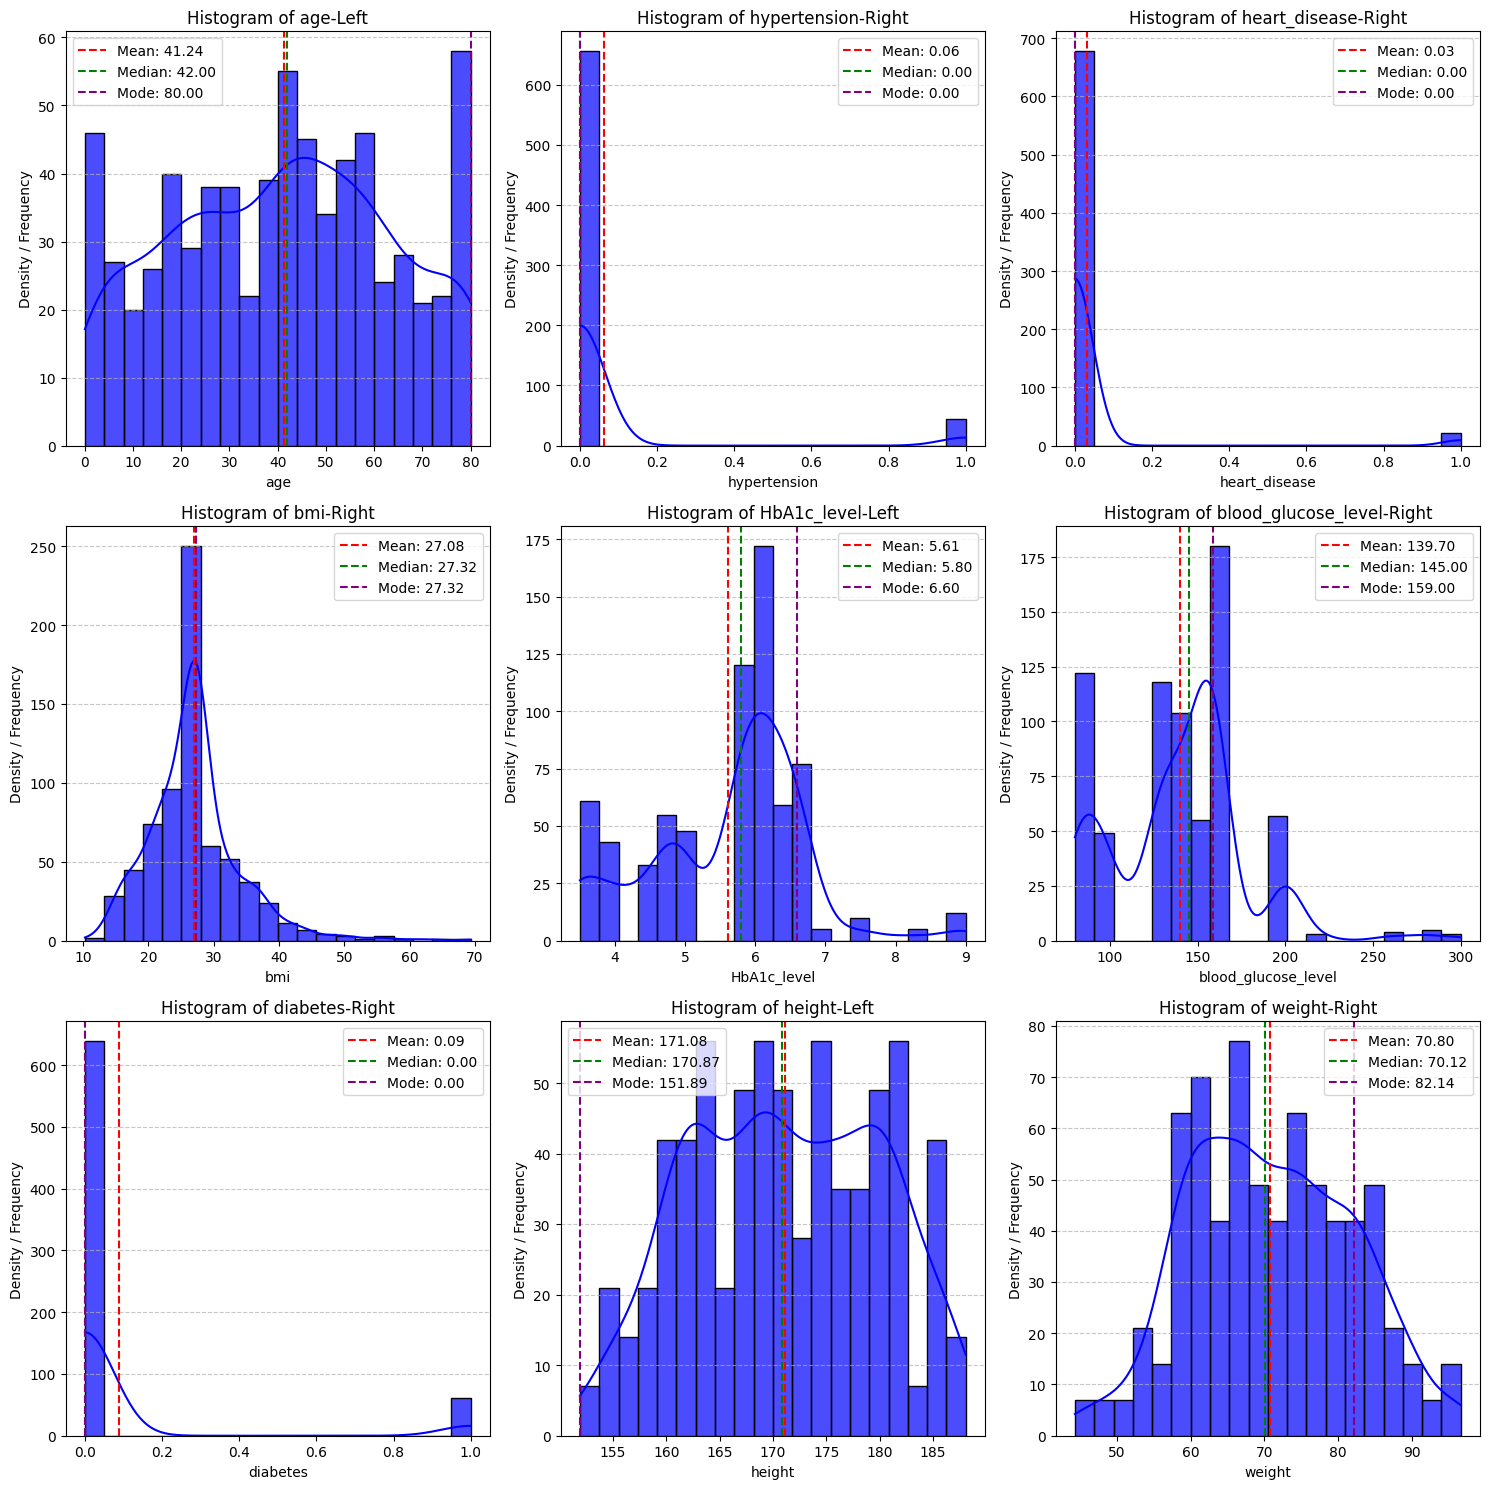

In [4]:
# Univariate Analysis - Histograms for numerical columns
# Get all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

# Plot histograms and check skewness for all numerical columns
plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Interpreation : Age people less than 40 is more , majority dont habe hypertension and heart disease and diabetes also

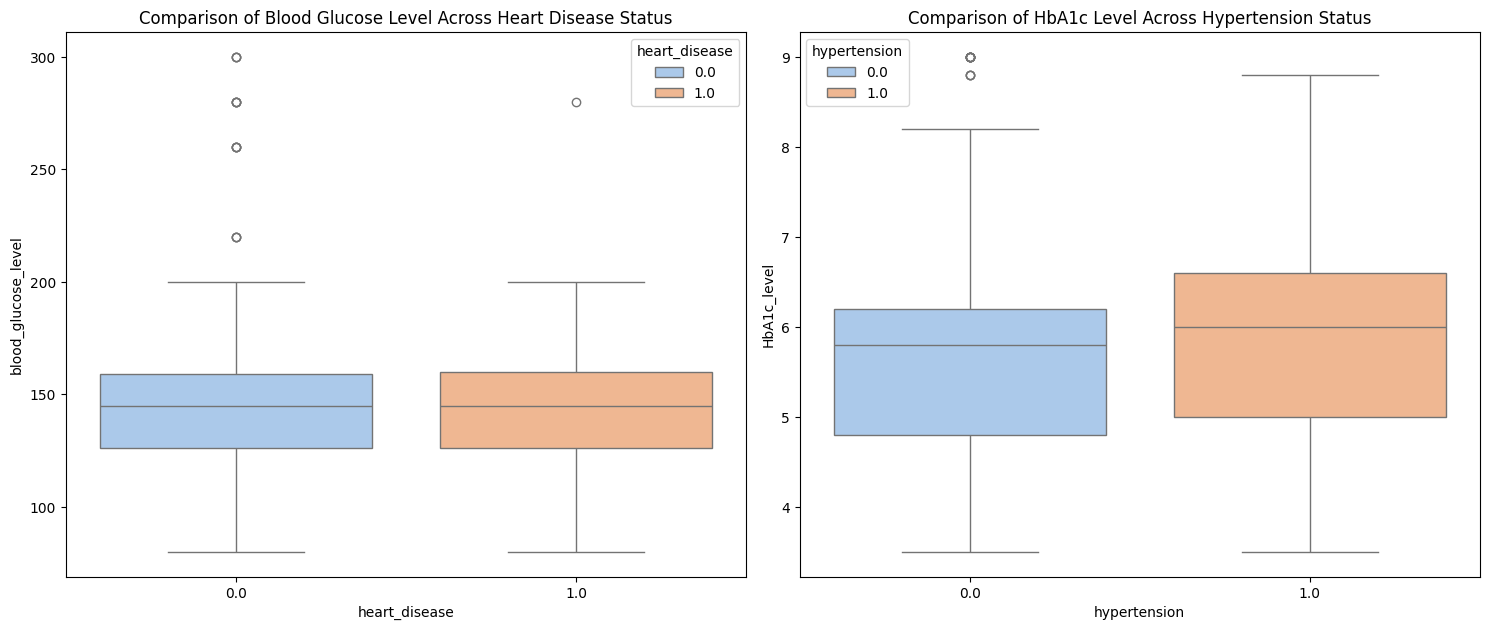

In [21]:
# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure with 2 rows and 2 columns for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 2: Comparison of HbA1c Level across Hypertension status
plt.subplot(2, 2, 2)
sns.boxplot(x='hypertension', y='HbA1c_level', data=df, hue='hypertension')
plt.title('Comparison of HbA1c Level Across Hypertension Status')

# Boxplot 3: Comparison of Blood Glucose Level across Heart Disease status
plt.subplot(2, 2, 1)
sns.boxplot(x='heart_disease', y='blood_glucose_level', data=df, hue='heart_disease')
plt.title('Comparison of Blood Glucose Level Across Heart Disease Status')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Outliers:Dots represent outliers in the boxplot
#Median (Central Line): The line inside the box
#Interquartile Range (IQR): The distance between the 1st quartile (Q1) and 3rd quartile (Q3), which makes up the box
#Whiskers: Lines that extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.
#Interpretation : 


C:\Users\HP\AppData\Local\Temp\ipykernel_10944\1779737255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_10944\1779737255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


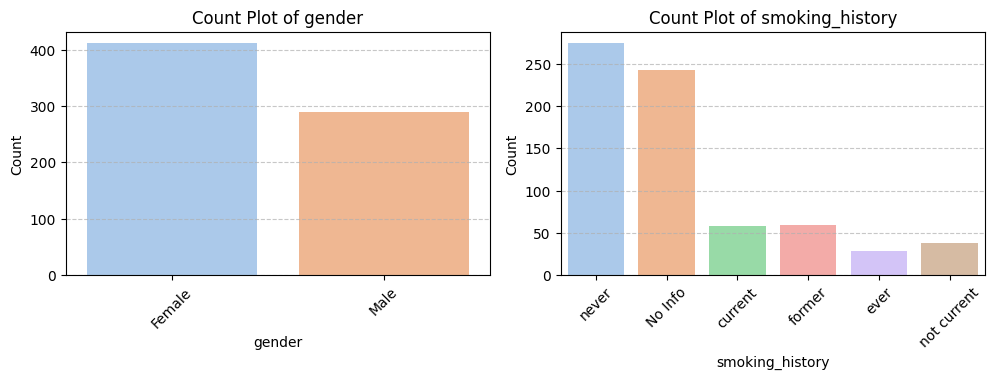

In [6]:
# Univariate Analysis - Count plots for categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
#INterpretation : emake patients are more and mahorit has never smoking peoples

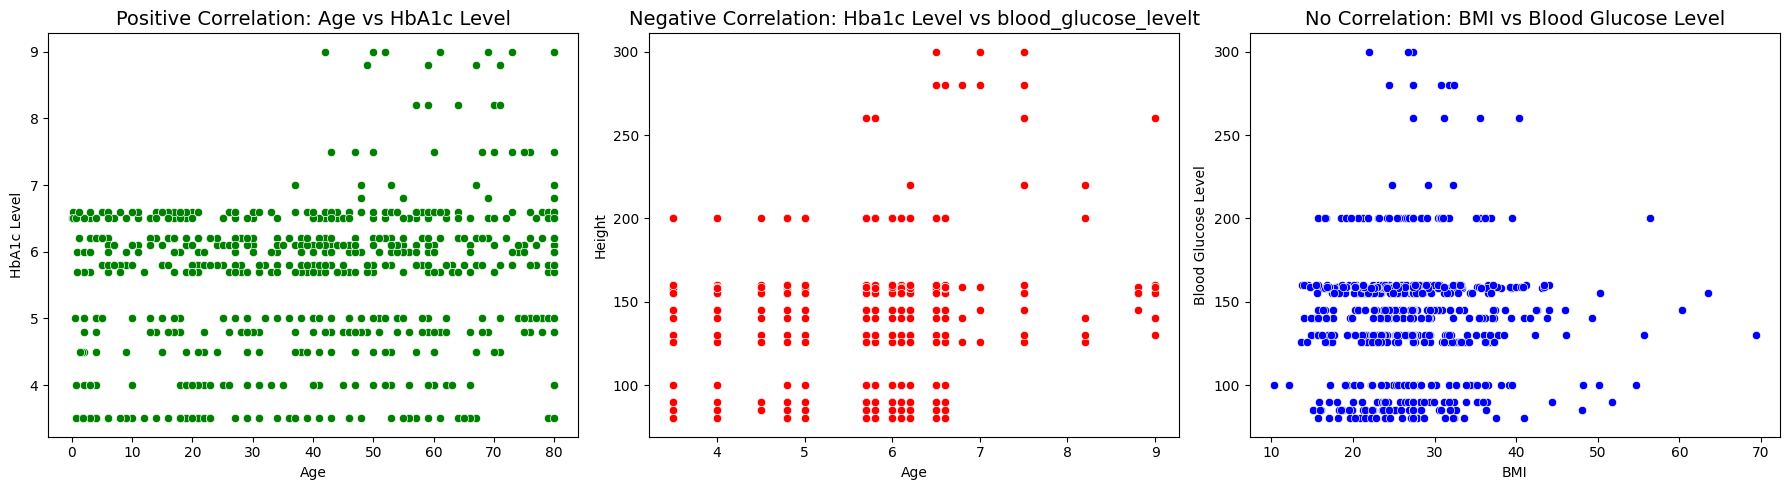

In [22]:
# Positive Correlation (e.g., age vs. HbA1c_level)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='HbA1c_level', data=df, color='green')
plt.title('Positive Correlation: Age vs HbA1c Level', fontsize=14)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')

# Negative Correlation (e.g., age vs. height)
plt.subplot(1, 3, 2)
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=df, color='red')
plt.title('Negative Correlation: Hba1c Level vs blood_glucose_levelt', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Height')

# No Correlation (e.g., gender vs. BMI as an example if categorical, but can be extended)
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df, color='blue')
plt.title('No Correlation: BMI vs Blood Glucose Level', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()
#positive Correlation: As one variable increases, so does the other (Age and HbA1c).
#Negative Correlation: As one variable increases, the other decreases (Hba1c and blood glucose).
#No Correlation: No clear trend or pattern exists between the two variables (BMI and Blood Glucose Level).

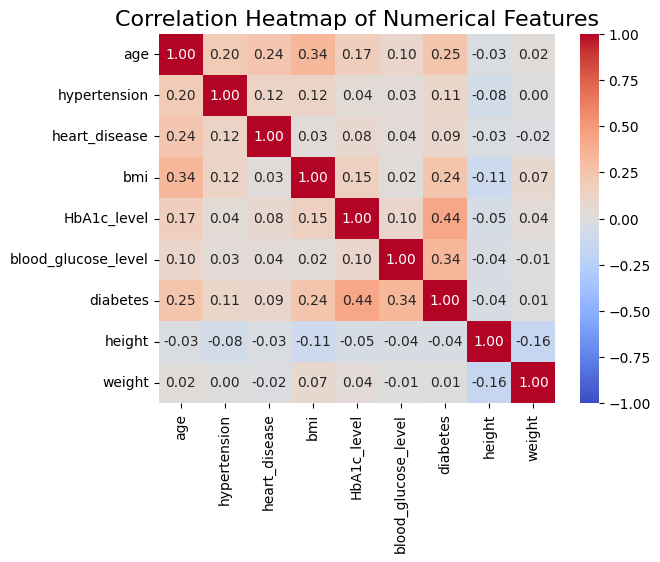

In [9]:
# Correlation heatmap for numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Multivariate - Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()
#The heatmap will display a grid where each cell represents the correlation between two variables.
    #Positive correlations are highlighted in shades of blue.
    #Negative correlations are in shades of red.
    #A correlation of 0 will be neutral (often white or gray)

In [10]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical features
df["gender"] = LabelEncoder().fit_transform(df['gender'])
df["smoking_history"] = LabelEncoder().fit_transform(df['smoking_history'])
print(df)

     gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0  80.0           0.0            1.0                4  25.19   
1         0  54.0           0.0            0.0                0  27.32   
2         1  28.0           0.0            0.0                4  27.32   
3         0  36.0           0.0            0.0                1  23.45   
4         1  76.0           1.0            1.0                1  20.14   
..      ...   ...           ...            ...              ...    ...   
695       0  62.0           0.0            0.0                2  27.27   
696       0  53.0           0.0            0.0                2  42.40   
697       0  55.0           0.0            0.0                4  35.42   
698       0  64.0           0.0            0.0                2  49.27   
699       0  40.0           0.0            0.0                4  31.16   

     HbA1c_level  blood_glucose_level  diabetes  height  weight  
0            6.6                  140       0

In [11]:
X=df.drop('diabetes',axis=1).values  #independent variable - features
y=df['diabetes'].values   #dependent variable - target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=21, stratify=y)

#test_size=0.4 : 40% testing ,60% training 
#random state : ensures that the data is split in the same way every time you run the code.
#stratify=y  :  both the training and testing sets have a similar proportion of 0's and 1's

In [12]:
# Setup a knn classifier with k neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the KNN model
knn.fit(X_train,y_train)

#classifies data point based on the class of its closest neighbor. 
#it can be sensitive to noise in the data because if the closest point is noisy or an outlier, it will heavily influence the prediction.
# it will look at the stored training data to find the nearest neighbor(s).

KNeighborsClassifier(n_neighbors=1)

In [13]:
X_test = X_test.T  # Transpose if necessary
print(X_test.shape)  # It should now be (number_of_samples, 12)


(10, 280)


In [23]:
knn.score(X_test,y_test)
#The higher this value, the better the model's performance

0.9238095238095239

In [24]:
#let us get the predictions using the classifier we had fit above.
# Using confusion matrix.
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

#Interpreting the Confusion Matrix:
#True Positives (TP): Correctly predicted positive cases (e.g., the model predicted diabetes = 1, and the person actually has diabetes).
#True Negatives (TN): Correctly predicted negative cases (e.g., the model predicted no diabetes = 0, and the person doesn't have diabetes).
#False Positives (FP): Incorrectly predicted positive cases (e.g., the model predicted diabetes = 1, but the person doesn't have diabetes).
#False Negatives (FN): Incorrectly predicted negative cases (e.g., the model predicted no diabetes = 0, but the person has diabetes).

array([[188,   0],
       [ 16,   6]], dtype=int64)

In [25]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No Diabetes', 'Predicted Has Diabetes'],
             index=['Actual No Diabetes', 'Actual Has Diabetes'])
#Interpretation:True Positives (TP): 6
    #The model correctly identified 6 cases as positive (diabetes present).
#True Negatives (TN): 188
    #The model correctly identified 188 cases as negative (diabetes absent).
#False Positives (FP): 0
    #The model didn't incorrectly classify any cases as positive when they were actually negative.
#False Negatives (FN): 16
    #The model incorrectly classified 16 cases as negative when they were actually positive.

,Predicted No Diabetes,Predicted Has Diabetes
Actual No Diabetes,188,0
Actual Has Diabetes,16,6


In [26]:
# Obtain Classification Report.
print(classification_report(y_test,y_pred))

#Interpretation
#Class 0 (Negative class): How well the model predicted the negative class (no diabetes).
#Class 1 (Positive class): How well the model predicted the positive class (diabetes).

#Accuracy: Overall accuracy of the model (correct predictions divided by total predictions).
#Macro Average: Average of Precision, Recall, and F1-Score across all classes, without considering class imbalance.
#Weighted Average: Weighted average of Precision, Recall, and F1-Score across all classes, considering the support  for each class.

#Accuracy:It measures how many predictions your model got right out of the total predictions.
#Precision:It measures how many of the positive predictions were actually correct.
# F1 Score  : Useful when you want to focus on both false positives and false negatives.

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       188
         1.0       1.00      0.27      0.43        22

    accuracy                           0.92       210
   macro avg       0.96      0.64      0.69       210
weighted avg       0.93      0.92      0.90       210



Text(0, 0.5, 'Error Rate')

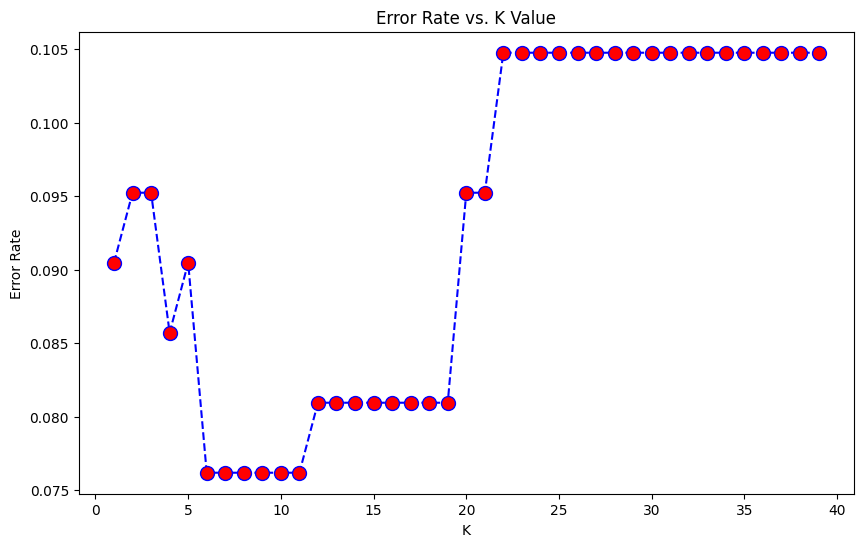

In [27]:
# Using elbow method to find best K value.

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
# Plotting the graph for best fitting K value between 1 to 40.

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


#The best K value is usually where the error rate is lowest, and beyond which it doesn't decrease significantly. 
#This point forms an "elbow" in the graph, where the curve flattens out.
#if the graph shows that the error rate decreases steeply at first and then starts flattening out after K=10, then K=10 would be a good choice for your model.

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: ",knn.score(X_test,y_test))
#retrain by chnging k values to determine whether they have better accuracy

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       188
         1.0       1.00      0.27      0.43        22

    accuracy                           0.92       210
   macro avg       0.96      0.64      0.69       210
weighted avg       0.93      0.92      0.90       210

Accuracy:  0.9238095238095239


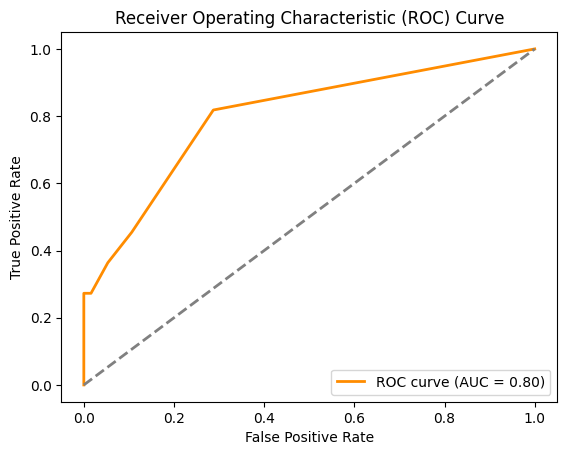

AUC: 0.80


In [39]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities (probability of class 1)
y_prob = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Compute false positive rate and true positive rate
roc_auc = auc(fpr, tpr)  # Compute the area under the curve

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

#ROC is the curve.
#AUC is the numerical value summarizing the ROC curve's performance.